In [1]:
import pandas as pd 
import numpy as np
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
def ln_return(price):
    price['PX_LAST+1']= pd.Series(price.PX_LAST.shift(+1))
    price_ln= np.log(price.PX_LAST) - np.log(price["PX_LAST+1"])
    price['ln_ret'] = pd.Series(price_ln)
    price.drop(price.head(1).index,inplace=True)   
    return

In [3]:
def ols(stock, market):
    global params
    global mse
    reg=pd.concat([stock["ln_ret"],market["ln_ret"]], axis=1)
    reg.columns = ['Tencent', 'HSI']
    print(reg)
    print ("Shapiro Test for Tencent Return is", stats.shapiro(stock["ln_ret"]))
    print ("Shapiro Test for HSI Return is", stats.shapiro(market["ln_ret"]))
    print ("Anderson-Darling Test for Tencent Return is", stats.anderson(stock["ln_ret"], dist='norm'))
    print ("Anderson-Darling Test for HSI Return is", stats.anderson(market["ln_ret"], dist='norm'))
    results =smf.ols("Tencent ~ HSI",data=reg).fit()
    print (results.summary())
    params=results.params
    print(results.params)
    mse =results.mse_resid
    return

In [4]:
#813
#Tencent Adjusted Share Price in Estimation Window of 813
est_813_tc= pd.read_csv('est-win-813.csv',index_col=0)
ln_return(est_813_tc)
print(est_813_tc)

#HSI 
est_813_HSI = pd.read_csv('est-win-813-HSI.csv',index_col=0)
ln_return(est_813_HSI)
print(est_813_HSI)

#regression 813
ols(est_813_tc,est_813_HSI)
const_813, ln_ret_813= round(params,6)
r_mse = mse**.5

print ("MSE Root=%s" %(r_mse))
print ("Return of Tencent = %s + %s(Return of HSI)" %(const_813,ln_ret_813))

            PX_LAST  PX_LAST+1    ln_ret
Date                                    
13/03/2018  462.759    459.960  0.006067
14/03/2018  463.559    462.759  0.001727
15/03/2018  468.559    463.559  0.010728
16/03/2018  465.159    468.559 -0.007283
19/03/2018  461.760    465.159 -0.007334
20/03/2018  466.559    461.760  0.010339
21/03/2018  462.559    466.559 -0.008610
22/03/2018  439.362    462.559 -0.051450
23/03/2018  419.963    439.362 -0.045157
26/03/2018  426.563    419.963  0.015593
27/03/2018  432.162    426.563  0.013040
28/03/2018  412.164    432.162 -0.047379
29/03/2018  409.564    412.164 -0.006328
03/04/2018  409.364    409.564 -0.000488
04/04/2018  397.565    409.364 -0.029246
06/04/2018  405.764    397.565  0.020413
09/04/2018  409.964    405.764  0.010298
10/04/2018  417.163    409.964  0.017408
11/04/2018  419.563    417.163  0.005737
12/04/2018  413.164    419.563 -0.015369
13/04/2018  407.964    413.164 -0.012666
16/04/2018  402.965    407.964 -0.012329
17/04/2018  397.

In [30]:
def abret(ret,act):
    ret = pd.Series(ret["ln_ret"])
    er = const_813 + ln_ret_813 * ret
    act['ER'] = pd.Series(er)
    act["AR"]= act.ln_ret-act.ER
    act['AR Beta'] = (act["AR"]/r_mse)
    act["CAR"]= act["AR"].cumsum()
    act["CAR Beta"]= (act["CAR"]/ ((len(act)**.5)*r_mse))
    act = act.drop(act.columns[[0, 1]], axis=1)
    print (act)
    act.to_excel("output.xlsx")
    return

In [6]:
#Actual return on 813
act_813_tc= pd.read_excel('act-win-813.xlsx',index_col=0)
ln_return(act_813_tc)
print(act_813_tc)

#Actual HSI return on 813
act_813_HSI= pd.read_excel('act-win-813-HSI.xlsx',index_col=0)
ln_return(act_813_HSI)
print(act_813_HSI)


#Abnormal Return 831
abret(act_813_HSI,act_813_tc)

            PX_LAST  PX_LAST+1    ln_ret
Date                                    
2018-08-13  360.968    369.970 -0.024633
2018-08-14  348.569    360.968 -0.034953
2018-08-15  335.971    348.569 -0.036811
2018-08-16  325.771    335.971 -0.030830
             PX_LAST  PX_LAST+1    ln_ret
Date                                     
2018-08-13  27936.57   28366.62 -0.015277
2018-08-14  27752.93   27936.57 -0.006595
2018-08-15  27323.59   27752.93 -0.015591
2018-08-16  27100.06   27323.59 -0.008214
              ln_ret        ER        AR   AR Beta       CAR  CAR Beta
Date                                                                  
2018-08-13 -0.024633 -0.020712 -0.003920 -0.364582 -0.003920 -0.182291
2018-08-14 -0.034953 -0.009328 -0.025625 -2.383030 -0.029546 -1.373806
2018-08-15 -0.036811 -0.021125 -0.015687 -1.458792 -0.045233 -2.103202
2018-08-16 -0.030830 -0.011451 -0.019379 -1.802140 -0.064612 -3.004271


In [7]:
#Actual return on 831
act_831_tc= pd.read_excel('act-win-831.xlsx',index_col=0)
ln_return(act_831_tc)
print(act_831_tc)

#Actual HSI return on 831
act_831_HSI= pd.read_excel('act-win-831-HSI.xlsx',index_col=0)
ln_return(act_831_HSI)
print(act_831_HSI)


#Abnormal Return 831
abret(act_831_HSI,act_831_tc)

            PX_LAST  PX_LAST+1    ln_ret
Date                                    
2018-08-31  339.970    357.370 -0.049914
2018-09-03  332.771    339.970 -0.021403
2018-09-04  338.570    332.771  0.017276
2018-09-05  324.772    338.570 -0.041607
             PX_LAST  PX_LAST+1    ln_ret
Date                                     
2018-08-31  27888.55   28164.05 -0.009830
2018-09-03  27712.54   27888.55 -0.006331
2018-09-04  27973.34   27712.54  0.009367
2018-09-05  27243.85   27973.34 -0.026424
              ln_ret        ER        AR   AR Beta       CAR  CAR Beta
Date                                                                  
2018-08-31 -0.049914 -0.013570 -0.036344 -3.379834 -0.036344 -1.689917
2018-09-03 -0.021403 -0.008982 -0.012421 -1.155114 -0.048766 -2.267474
2018-09-04  0.017276  0.011604  0.005672  0.527452 -0.043094 -2.003748
2018-09-05 -0.041607 -0.035331 -0.006277 -0.583702 -0.049371 -2.295599


In [8]:
#Actual return on 96
act_96_tc= pd.read_excel('act-win-96.xlsx',index_col=0)
ln_return(act_96_tc)
print(act_96_tc)

#Actual HSI return on 96
act_96_HSI= pd.read_excel('act-win-96-HSI.xlsx',index_col=0)
ln_return(act_96_HSI)
print(act_96_HSI)

#Abnormal Return 96
abret(act_96_HSI,act_96_tc)

            PX_LAST  PX_LAST+1    ln_ret
Date                                    
2018-09-07  316.772    314.572  0.006969
2018-09-10  313.573    316.772 -0.010150
2018-09-11  307.973    313.573 -0.018020
2018-09-12  308.373    307.973  0.001298
             PX_LAST  PX_LAST+1    ln_ret
Date                                     
2018-09-07  26973.47   26974.82 -0.000050
2018-09-10  26613.42   26973.47 -0.013438
2018-09-11  26422.55   26613.42 -0.007198
2018-09-12  26345.04   26422.55 -0.002938
              ln_ret        ER        AR   AR Beta       CAR  CAR Beta
Date                                                                  
2018-09-07  0.006969 -0.000745  0.007714  0.717354  0.007714  0.358677
2018-09-10 -0.010150 -0.018301  0.008151  0.758032  0.015865  0.737693
2018-09-11 -0.018020 -0.010118 -0.007902 -0.734855  0.007963  0.370265
2018-09-12  0.001298 -0.004532  0.005829  0.542113  0.013793  0.641322


In [9]:
#calculate AAR
aar = []
for ar in act_813_tc['AR'],act_831_tc['AR'],act_96_tc['AR']:
    ar = ar.reset_index()
    ar = ar['AR']
    aar.append(ar/3)
aar = pd.concat(aar, axis=1)
aar= aar.sum(axis=1)
print (aar)

0   -0.010850
1   -0.009965
2   -0.005972
3   -0.006609
dtype: float64


In [10]:
#calculate CAAR
caar = []
for car in act_813_tc['CAR'],act_831_tc['CAR'],act_96_tc['CAR']:
    car = car.reset_index()
    car = car['CAR']
    caar.append(car/3)
caar = pd.concat(caar, axis=1)
caar= caar.sum(axis=1)
print (caar)

0   -0.010850
1   -0.020815
2   -0.026788
3   -0.033396
dtype: float64


In [28]:
aar_var= (r_mse*3)/(3**2)
taar = aar/aar_var
print (aar_var)
print (taar)

0.003584431401143399
0   -3.027062
1   -2.780112
2   -1.666195
3   -1.843728
dtype: float64


In [12]:
caar_var = ((4**.5)*(r_mse*3))/(3**2)
tcaar = caar/caar_var
print (tcaar)

0   -1.513531
1   -2.903587
2   -3.736685
3   -4.658549
dtype: float64


In [13]:
avg=pd.concat([aar, taar, caar,tcaar], axis=1)
avg.columns= ['AAR','AAR Beta', 'CAAR', 'CAAR Beta']
avg.to_excel("output.xlsx") 
print (avg)

        AAR  AAR Beta      CAAR  CAAR Beta
0 -0.010850 -3.027062 -0.010850  -1.513531
1 -0.009965 -2.780112 -0.020815  -2.903587
2 -0.005972 -1.666195 -0.026788  -3.736685
3 -0.006609 -1.843728 -0.033396  -4.658549


In [14]:
#Testing AR

#813 test
tar_813 = act_813_tc["AR"][0] / r_mse
print ("T-stat for 813 is %s" %tar_813)

#831 test
tar_831 = act_831_tc["AR"][0] / r_mse
print ("T-stat for 831 is %s" %tar_831)

#96 test
tar_96 = act_96_tc["AR"][0] / r_mse
print ("T-stat for 96 is %s" %tar_96)

T-stat for 813 is -0.36458192132558204
T-stat for 831 is -3.3798341814274506
T-stat for 96 is 0.7173540118817471


In [15]:
tar_813i = act_813_tc["AR"][1] / r_mse
print ("T-stat for 813 is %s" %tar_813i)

T-stat for 813 is -2.3830295093350595


In [16]:
car = lambda act: act["CAR"][-1]/ ((len(act)**.5)*r_mse)

In [17]:
#Test CAR
t813 = car(act_813_tc)
print(t813)

t831=car(act_831_tc)
print (t831)

t96=car(act_96_tc)
print (t96)

-3.004271436681762
-2.2955991337719643
0.641321838753723


In [18]:
#tTest AAR
var= (r_mse*3)/(3**2)
taar = aar[0]/ var
print (taar)

-3.0270620908712855


In [19]:
#Test CAAR
#CAAR variance:
caar_var = ((4**.5)*(r_mse*3))/(3**2)
tcaar = caar[3]/caar_var
print (caar_var)
print (tcaar)

0.007168862802286798
-4.658548731700004


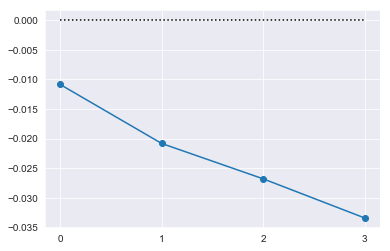

In [20]:
#caar curve
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
plt.plot(range(4),caar,"-o")
plt.hlines(0,0,3,linestyles='dotted')
plt.xticks(np.arange(0, 4, step=1))
plt.savefig('foo.png')
plt.show()


In [31]:
#insider 813
ins_813_tc= pd.read_excel('ins-win-813.xlsx',index_col=0)
ln_return(ins_813_tc)
print(ins_813_tc)

#Insider HSI return on 813
ins_813_HSI= pd.read_excel('ins-win-813-HSI.xlsx',index_col=0)
ln_return(ins_813_HSI)
print(ins_813_HSI)

#Insider Return 813
abret(ins_813_HSI,ins_813_tc)

            PX_LAST  PX_LAST+1    ln_ret
Date                                    
2018-08-09   372.57     363.97  0.023353
2018-08-10   369.97     372.57 -0.007003
             PX_LAST  PX_LAST+1    ln_ret
Date                                     
2018-08-09  28607.30   28359.14  0.008713
2018-08-10  28366.62   28607.30 -0.008449
              ln_ret        ER        AR   AR Beta       CAR  CAR Beta
Date                                                                  
2018-08-09  0.023353  0.010746  0.012607  1.172396  0.012607  0.829009
2018-08-10 -0.007003 -0.011759  0.004756  0.442238  0.017363  1.141719


In [33]:
#Insider return on 831
ins_831_tc= pd.read_excel('ins-win-831.xlsx',index_col=0)
ln_return(ins_831_tc)
print(ins_831_tc)

#Insider HSI return on 831
ins_831_HSI= pd.read_excel('ins-win-831-HSI.xlsx',index_col=0)
ln_return(ins_831_HSI)
print(ins_831_HSI)


#Insider Return 831
abret(ins_831_HSI,ins_831_tc)

            PX_LAST  PX_LAST+1    ln_ret
Date                                    
2018-08-29   360.77     365.37 -0.012670
2018-08-30   357.37     360.77 -0.009469
             PX_LAST  PX_LAST+1    ln_ret
Date                                     
2018-08-29  28416.44   28351.62  0.002284
2018-08-30  28164.05   28416.44 -0.008922
              ln_ret        ER        AR   AR Beta       CAR  CAR Beta
Date                                                                  
2018-08-29 -0.012670  0.002316 -0.014986 -1.393587 -0.014986 -0.985415
2018-08-30 -0.009469 -0.012378  0.002909  0.270560 -0.012076 -0.794100


In [35]:
#Insider return on 96
ins_96_tc= pd.read_excel('ins-win-96.xlsx',index_col=0)
ln_return(ins_96_tc)
print(ins_96_tc)

#Insider HSI return on 96
ins_96_HSI= pd.read_excel('ins-win-96-HSI.xlsx',index_col=0)
ln_return(ins_96_HSI)
print(ins_96_HSI)

#Insider Return 96
abret(ins_96_HSI,ins_96_tc)

            PX_LAST  PX_LAST+1    ln_ret
Date                                    
2018-09-05  324.770     338.57 -0.041614
2018-09-06  314.572     324.77 -0.031904
             PX_LAST  PX_LAST+1    ln_ret
Date                                     
2018-09-05  27243.85   27973.34 -0.026424
2018-09-06  26974.82   27243.85 -0.009924
              ln_ret        ER        AR   AR Beta       CAR  CAR Beta
Date                                                                  
2018-09-05 -0.041614 -0.035331 -0.006283 -0.584274 -0.006283 -0.413144
2018-09-06 -0.031904 -0.013693 -0.018211 -1.693553 -0.024494 -1.610667


In [24]:
#Testing Insider AR Day -2

#813 test
tar_813 = ins_813_tc["AR"][0] / r_mse
print ("T-stat for 813 is %s" %tar_813)

#831 test
tar_831 = ins_831_tc["AR"][0] / r_mse
print ("T-stat for 831 is %s" %tar_831)

#96 test
tar_96 = ins_96_tc["AR"][0] / r_mse
print ("T-stat for 96 is %s" %tar_96)

T-stat for 813 is 1.1723961554304756
T-stat for 831 is -1.3935868253044235
T-stat for 96 is -0.5842742096622761


In [25]:
#Testing Insider AR Day -1

#813 test
tar_813 = ins_813_tc["AR"][1] / r_mse
print ("T-stat for 813 is %s" %tar_813)

#831 test
tar_831 = ins_831_tc["AR"][1] / r_mse
print ("T-stat for 831 is %s" %tar_831)

#96 test
tar_96 = ins_96_tc["AR"][1] / r_mse
print ("T-stat for 96 is %s" %tar_96)

T-stat for 813 is 0.4422377899031098
T-stat for 831 is 0.2705602287907721
T-stat for 96 is -1.6935525717143745


In [26]:
#Test CAR insider trading
t813 = car(ins_813_tc)
print(t813)

t831=car(ins_831_tc)
print (t831)

t96=car(ins_96_tc)
print (t96)

1.1417186118793674
-0.7940997218476517
-1.610666763479757


In [27]:
#not useful
var = 0
for caar_h in car_h_813, car_h_831, car_h_96:
    unmod_var = (caar_h - caar_var)**2
    var += unmod_var
    caar_beta_var = var/3**2
print (caar_beta_var)

NameError: name 'car_h_813' is not defined